<a href="https://colab.research.google.com/github/Niyati0747/RTA-dataset/blob/main/RTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving RTA Dataset.csv to RTA Dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("RTA Dataset.csv")
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.info
df.describe()


,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [ ]:
#checking missing values
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
#checking not null values
df.notnull().sum()

,0
Time,12316
Day_of_week,12316
Age_band_of_driver,12316
Sex_of_driver,12316
Educational_level,11575
Vehicle_driver_relation,11737
Driving_experience,11487
Type_of_vehicle,11366
Owner_of_vehicle,11834
Service_year_of_vehicle,8388


In [ ]:
#no missing values therefore don't need to correct any
#however making one dataframe to manipulate the data,crate missing values and fill them in with the mean and modes
df1=df.copy()
#calculating the statistical values of the dataset
mean_values=df.mean(numeric_only=True)
median_values=df.median(numeric_only=True)
mode_values=df.mode().iloc[0]   #Mode can have multiple values, so we take the first row
std_dev=df.std(numeric_only=True)
variance=df.var(numeric_only=True)
correlation_matrix=df.corr(numeric_only=True)
print("Mean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nMode Values:")
print(mode_values)
print("\nStandard Deviation:")
print(std_dev)
print("\nVariance:")
print(variance)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Mean Values:
Number_of_vehicles_involved    2.040679
Number_of_casualties           1.548149
dtype: float64

Median Values:
Number_of_vehicles_involved    2.0
Number_of_casualties           1.0
dtype: float64

Mode Values:
Time                                                                   15:30:00
Day_of_week                                                              Friday
Age_band_of_driver                                                        18-30
Sex_of_driver                                                              Male
Educational_level                                            Junior high school
Vehicle_driver_relation                                                Employee
Driving_experience                                                       5-10yr
Type_of_vehicle                                                      Automobile
Owner_of_vehicle                                                          Owner
Service_year_of_vehicle                                  

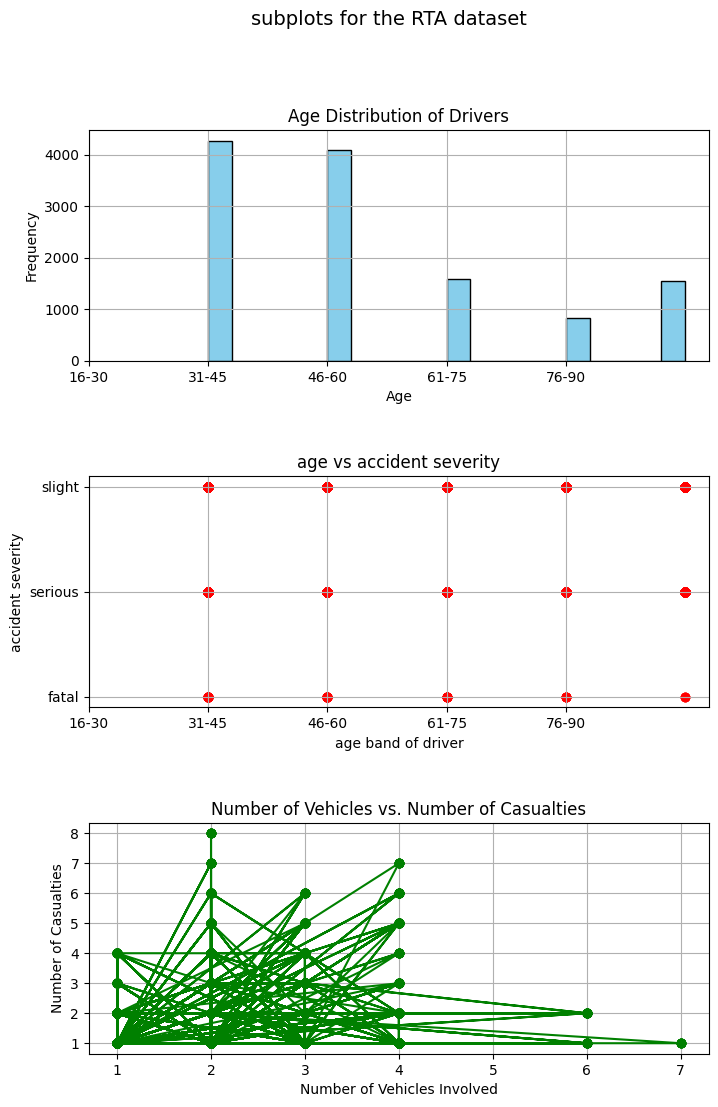

In [ ]:
import matplotlib.pyplot as plt
# create a figure with 3 subplots
plt.figure(figsize=(8, 12))

#first subplot: Age Distribution of Drivers
plt.subplot(3, 1 , 1)
plt.hist(df['Age_band_of_driver'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Drivers')
plt.xticks(ticks=[-1,0,1,2,3],labels=['16-30','31-45','46-60','61-75','76-90'])
plt.grid()

#second subplot: scatter plot of Age Vs, Severity
plt.subplot(3, 1 , 2)
plt.scatter(df['Age_band_of_driver'],df['Accident_severity'],color='red',alpha=0.6)
plt.xlabel("age band of driver")
plt.ylabel("accident severity")
plt.title('age vs accident severity')
plt.xticks(ticks=[-1,0,1,2,3],labels=['16-30','31-45','46-60','61-75','76-90'])
plt.yticks(ticks=[0,1,2],labels=['fatal','serious','slight'])
plt.grid()

#third subplot: line plot of Number of vehicles vs. Number of casualties
plt.subplot(3, 1 , 3)
plt.plot(df['Number_of_vehicles_involved'], df['Number_of_casualties'], marker='o', linestyle='-', color='green')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Casualties')
plt.title('Number of Vehicles vs. Number of Casualties')
plt.grid()

# Adjust the layout and display the plots
plt.subplots_adjust(hspace=0.5)
plt.suptitle("subplots for the RTA dataset",fontsize=14)
plt.show()

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes
# Features and target
X = df.drop("Accident_severity", axis=1).values
y = df["Accident_severity"].values

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#manual KNN Implementation
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        # Compute distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # k nearest neighbors
        k_idx = np.argsort(distances)[:self.k]
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # Majority vote
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

# Train and predict manually
l=int(input("enter the value of k:"))
knn_manual = KNN(k=l)
knn_manual.fit(X_train, y_train)
y_pred_manual = knn_manual.predict(X_test)
#  Evaluate Manual KNN
print("Manual KNN Accuracy:", accuracy_score(y_test, y_pred_manual))
print("Manual KNN Precision:", precision_score(y_test, y_pred_manual, average='weighted',zero_division=0))
print("Manual KNN Recall:", recall_score(y_test, y_pred_manual,average="weighted",zero_division=0))
print("Manual KNN F1 Score:", f1_score(y_test, y_pred_manual, average="weighted",zero_division=0))
report=classification_report(y_test,y_pred_manual)
print(report)
#Validate with scikit-learn
knn_sklearn = KNeighborsClassifier(n_neighbors=l)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

print("Sklearn KNN Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print("Sklearn KNN Precision:", precision_score(y_test, y_pred_sklearn, average='weighted',zero_division=0))
print("Sklearn KNN Recall:", recall_score(y_test, y_pred_sklearn, average='weighted',zero_division=0))
print("Sklearn KNN F1 Score:", f1_score(y_test, y_pred_sklearn, average='weighted',zero_division=0))
report=classification_report(y_test,y_pred_sklearn)
print(report)


enter the value of k:5
Manual KNN Accuracy: 0.8246753246753247
Manual KNN Precision: 0.7520412944056424
Manual KNN Recall: 0.8246753246753247
Manual KNN F1 Score: 0.7723180876976494
              precision    recall  f1-score   support

           0       0.25      0.03      0.05        37
           1       0.29      0.06      0.10       363
           2       0.84      0.97      0.90      2064

    accuracy                           0.82      2464
   macro avg       0.46      0.35      0.35      2464
weighted avg       0.75      0.82      0.77      2464

Sklearn KNN Accuracy: 0.8238636363636364
Sklearn KNN Precision: 0.7525756042019162
Sklearn KNN Recall: 0.8238636363636364
Sklearn KNN F1 Score: 0.773438016680431
              precision    recall  f1-score   support

           0       0.29      0.05      0.09        37
           1       0.28      0.06      0.10       363
           2       0.84      0.97      0.90      2064

    accuracy                           0.82      2464
   